In [25]:
import pandas as pd
import numpy as np
import mglearn

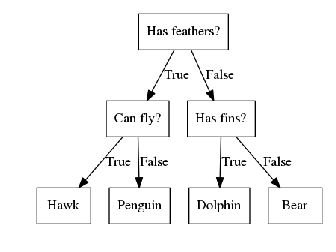

In [4]:
mglearn.plots.plot_animal_tree()

In [8]:
from sklearn.datasets import make_moons

In [9]:
data=make_moons()

In [14]:
X,y=data

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
X[:,0]

array([-0.09602303, -0.76144596,  0.05094425,  0.40478334,  0.6234898 ,
        1.67230089,  0.48160743,  1.92691676, -0.99794539, -0.40478334,
        0.8380881 ,  0.96729486,  0.09903113,  1.51839257,  0.3765102 ,
       -0.80141362,  0.22252093,  0.51839257,  0.94905575,  0.1286813 ,
        1.8713187 ,  0.59521666, -0.34536505,  0.71547241,  0.00820999,
       -0.8380881 ,  1.94905575,  1.80141362,  0.1619119 ,  1.28452759,
        1.22252093,  0.8713187 ,  0.19858638,  1.99179001, -0.57211666,
       -1.        ,  1.1595999 ,  0.80141362,  1.98155916,  1.        ,
        0.76144596,  0.67230089,  0.28452759,  0.53746171,  0.46253829,
        0.07308324, -0.03205158,  0.96794842, -0.51839257,  0.        ,
       -0.99179001, -0.98155916, -0.96729486,  2.        ,  1.57211666,
        0.00205461, -0.22252093,  0.23855404, -0.92691676, -0.71834935,
        0.92691676,  0.8404001 ,  1.8380881 ,  0.71834935,  1.90096887,
        0.32769911, -0.90096887,  1.99794539,  0.09602303,  0.99

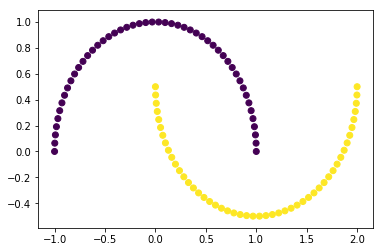

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)

In [21]:
from sklearn.svm import SVC

In [35]:
svm=SVC(C=0.1,kernel='rbf')

In [36]:
svm.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[-2.   -1.98 -1.96 ...,  2.94  2.96  2.98]
 [-2.   -1.98 -1.96 ...,  2.94  2.96  2.98]
 [-2.   -1.98 -1.96 ...,  2.94  2.96  2.98]
 ..., 
 [-2.   -1.98 -1.96 ...,  2.94  2.96  2.98]
 [-2.   -1.98 -1.96 ...,  2.94  2.96  2.98]
 [-2.   -1.98 -1.96 ...,  2.94  2.96  2.98]]
(175, 250)
[[-1.49948622 -1.49948622 -1.49948622 ..., -1.49948622 -1.49948622
  -1.49948622]
 [-1.47948622 -1.47948622 -1.47948622 ..., -1.47948622 -1.47948622
  -1.47948622]
 [-1.45948622 -1.45948622 -1.45948622 ..., -1.45948622 -1.45948622
  -1.45948622]
 ..., 
 [ 1.94051378  1.94051378  1.94051378 ...,  1.94051378  1.94051378
   1.94051378]
 [ 1.96051378  1.96051378  1.96051378 ...,  1.96051378  1.96051378
   1.96051378]
 [ 1.98051378  1.98051378  1.98051378 ...,  1.98051378  1.98051378
   1.98051378]]
(175, 250)
[[-2.         -1.49948622]
 [-1.98       -1.49948622]
 [-1.96       -1.49948622]
 ..., 
 [ 2.94        1.98051378]
 [ 2.96        1.98051378]
 [ 2.98        1.98051378]]
(43750, 2)


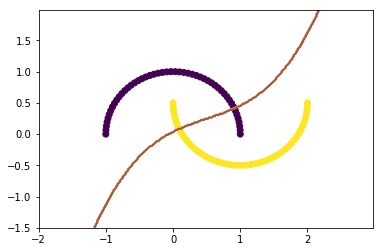

In [47]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
print (xx)
print (xx.shape)
print (yy)
print (yy.shape)
print (np.c_[xx.ravel(), yy.ravel()])
print(np.c_[xx.ravel(), yy.ravel()].shape)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [53]:
cancer=load_breast_cancer()

In [57]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [130]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)

In [131]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [132]:
print(tree.score(X_train,y_train))

0.988262910798


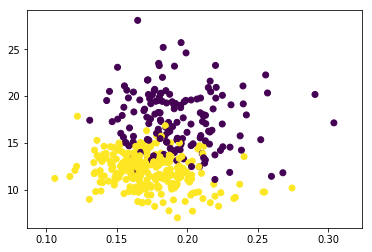

In [133]:
plt.scatter(X_train[:,8],X_train[:,0],c=y_train)

In [134]:
tree.score(X_test,y_test)

0.95104895104895104

In [135]:
from sklearn.tree import export_graphviz

In [136]:
export_graphviz(tree,out_file="tree.dot",class_names=['malignant','benign'],
                feature_names=cancer.feature_names,impurity=False,filled=True)

In [137]:
import graphviz

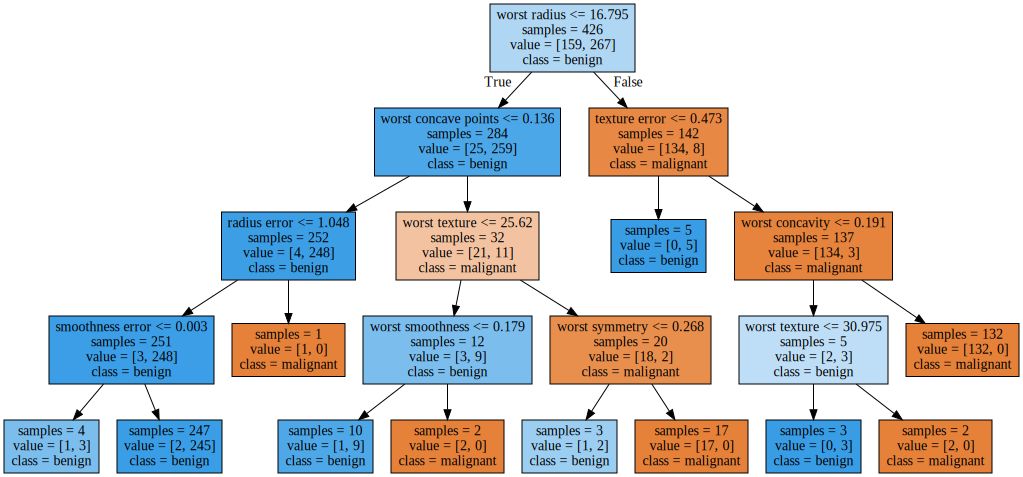

In [138]:
with open("tree.dot") as f:
    g=f.read()
graphviz.Source(g)

In [144]:
def plot_f():
    n=cancer.data.shape[1]
    plt.figure(figsize=(15,10))
    plt.barh(range(n),tree.feature_importances_,align="center")
    plt.yticks(np.arange(n),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

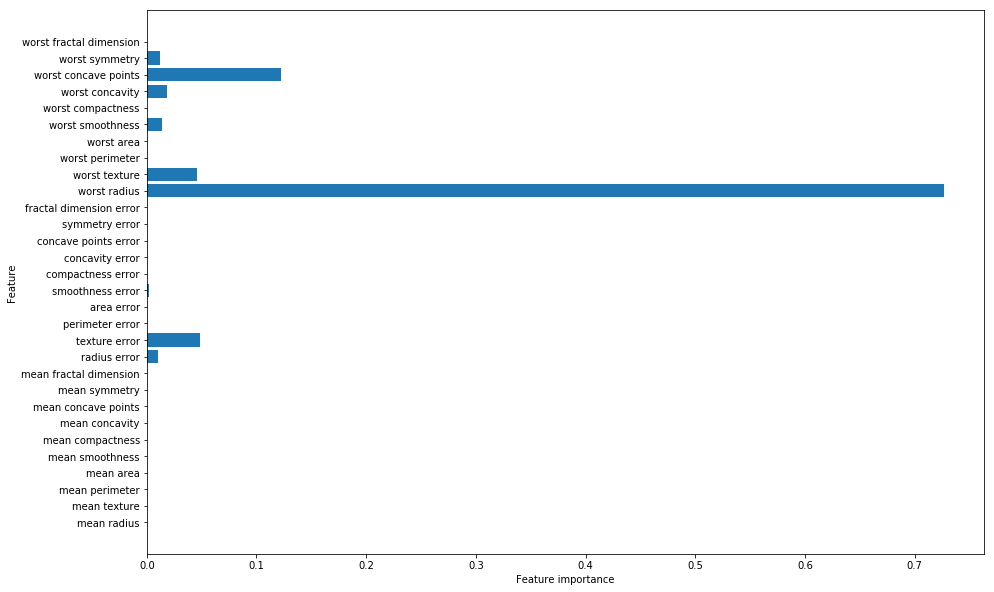

In [145]:
plot_f()